In [1]:
import sys
import sklearn
import numpy as np
import matplotlib as mpl
import pandas as pd
import os
import tarfile
import urllib.request
data = pd.read_csv('data/diabetes_binary_health_indicators_BRFSS2015.csv')

In [3]:
data.head()
print(len(data.columns))

22


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [51]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [64]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size = 0.2, random_state = 0)


In [53]:
train_set.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
160780,0.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,1.0,0.0,0.0,1.0,7.0,5.0,7.0
249661,0.0,0.0,0.0,1.0,31.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,3.0,10.0,0.0,0.0,0.0,3.0,5.0,6.0
26769,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,6.0,6.0,8.0
182771,0.0,1.0,0.0,1.0,24.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,10.0,1.0,0.0,13.0,4.0,7.0
117116,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,5.0,5.0


<AxesSubplot:>

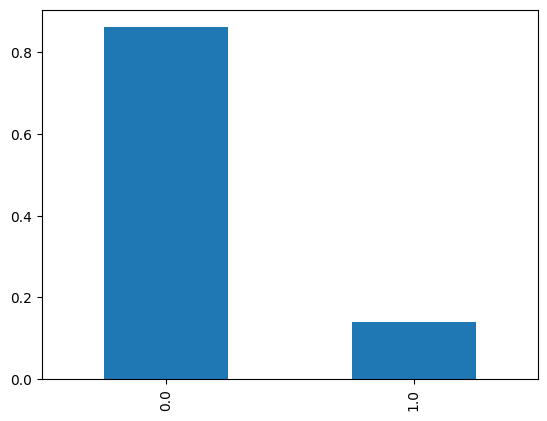

In [54]:
#descriptive analysis of the data
data['Diabetes_binary'].value_counts(normalize=True).plot(kind='bar')

#same proportions between different sexes? Level of education? High or low cholesterol?


In [55]:
corr_matrix = data.corr()
corr_matrix['Diabetes_binary'].sort_values(ascending=False)


Diabetes_binary         1.000000
GenHlth                 0.293569
HighBP                  0.263129
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
Stroke                  0.105816
MentHlth                0.069315
CholCheck               0.064761
Smoker                  0.060789
NoDocbcCost             0.031433
Sex                     0.031430
AnyHealthcare           0.016255
Fruits                 -0.040779
Veggies                -0.056584
HvyAlcoholConsump      -0.057056
PhysActivity           -0.118133
Education              -0.124456
Income                 -0.163919
Name: Diabetes_binary, dtype: float64

array([[<AxesSubplot:xlabel='Diabetes_binary', ylabel='Diabetes_binary'>,
        <AxesSubplot:xlabel='GenHlth', ylabel='Diabetes_binary'>,
        <AxesSubplot:xlabel='HighBP', ylabel='Diabetes_binary'>,
        <AxesSubplot:xlabel='DiffWalk', ylabel='Diabetes_binary'>],
       [<AxesSubplot:xlabel='Diabetes_binary', ylabel='GenHlth'>,
        <AxesSubplot:xlabel='GenHlth', ylabel='GenHlth'>,
        <AxesSubplot:xlabel='HighBP', ylabel='GenHlth'>,
        <AxesSubplot:xlabel='DiffWalk', ylabel='GenHlth'>],
       [<AxesSubplot:xlabel='Diabetes_binary', ylabel='HighBP'>,
        <AxesSubplot:xlabel='GenHlth', ylabel='HighBP'>,
        <AxesSubplot:xlabel='HighBP', ylabel='HighBP'>,
        <AxesSubplot:xlabel='DiffWalk', ylabel='HighBP'>],
       [<AxesSubplot:xlabel='Diabetes_binary', ylabel='DiffWalk'>,
        <AxesSubplot:xlabel='GenHlth', ylabel='DiffWalk'>,
        <AxesSubplot:xlabel='HighBP', ylabel='DiffWalk'>,
        <AxesSubplot:xlabel='DiffWalk', ylabel='DiffWalk'>]], dty

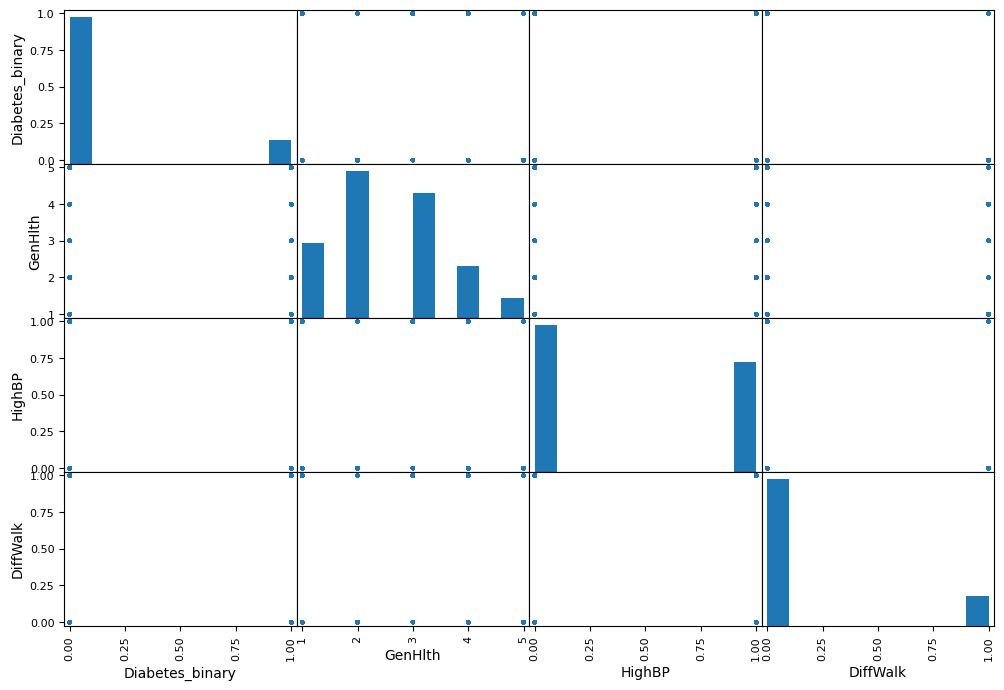

In [56]:
from pandas.plotting import scatter_matrix

attributes = ['Diabetes_binary', 'GenHlth', 'HighBP', 'DiffWalk']
scatter_matrix(data[attributes], figsize=(12,8))

In [57]:
#someone can try and make some cool graphs on all the data

In [69]:
# logistic regression model using genhlth hughbp and diffwalk
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

y_train = train_set['Diabetes_binary']
y_test = test_set['Diabetes_binary']

attributes1 = ['GenHlth', 'HighBP', 'DiffWalk']

x_train = train_set[attributes1]
x_test = test_set[attributes1]

logisticRegr.fit(x_train,y_train)

# predictions not used, may use later?
predictions = logisticRegr.predict(x_test)

score = logisticRegr.score(x_test, y_test)
print(score)

import pickle
pickle.dump(logisticRegr, open('model.pkl', 'wb'))



0.8560982339955849
